Как узнать свою аудиторию? Построение различных вариантов кластеризаций и интерпретация результатов.
##### Цель: На этот раз займемся классической задачкой - сегментация клиентов (в данном случае - банка). Крайне полезная операция, которая позволяет вам лучше познакомится со своей аудиторией, понять, на какие группы она делится и чем они характеризуются.


##### Часть 1. EDA и Preprocessing

1.Скачайте данные по клиентам немецкого банка: https://www.kaggle.com/uciml/german-credit

2.Проведите EDA, чтобы познакомиться с признаками 

3.Преобразуйте все признаки в числовые подходящими методами

4.Приведите все данные к одному масштабу (а заодно поясните, почему это необходимая операция при кластеризации)

##### Часть 2. Моделирование

1.Постройте три варианта кластеризации: k-means, hierarhical и DBSCAN, подберите оптимальное количество кластеров для каждого метода при помощи Elbow method и Silhouette plot 

2.Также воспользуйтесь различными вариантами сжатия признакового пространства (PCA, UMAP, tSNE) и визуализируйте результаты кластеризации на двумерной плоскости 

##### Часть 3. Интерпретация

1.Теперь ваша задача - попытаться проинтерпретировать получившиеся кластеры, начните с простого расчета средних значений признаков для каждого из кластеров, есть ли интересные закономерности? 

2.Теперь постройте boxplot-ы для каждого признака, сгруппировав значения по кластерам, по каким признакам заметно наибольшее отличие кластеров друг от друга? Можно ли их интерпретировать? 

In [55]:
from __future__ import print_function
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


# Start from importing necessary packages.
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from IPython.display import display
from sklearn import metrics # for evaluations
from sklearn.datasets import make_blobs, make_circles # for generating experimental data
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 8)
pd.options.display.float_format = '{:.2f}'.format

# make matplotlib plot inline (Only in Ipython).
warnings.filterwarnings('ignore')
label_encoder = LabelEncoder()

In [56]:
data = pd.read_csv('german_credit_data.csv')

In [57]:
data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


## Часть 1. EDA и Preprocessing

In [58]:
data=data.drop(['Unnamed: 0'],axis=1)
data_original = data.copy()

In [59]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [60]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [61]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [62]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.00,1000.00,1000.00,1000.00
mean,35.55,1.90,3271.26,20.90
std,11.38,0.65,2822.74,12.06
min,19.00,0.00,250.00,4.00
25%,27.00,2.00,1365.50,12.00
50%,33.00,2.00,2319.50,18.00
75%,42.00,2.00,3972.25,24.00
max,75.00,3.00,18424.00,72.00


In [63]:
data.Age.unique().sum()

2394

#### AGE

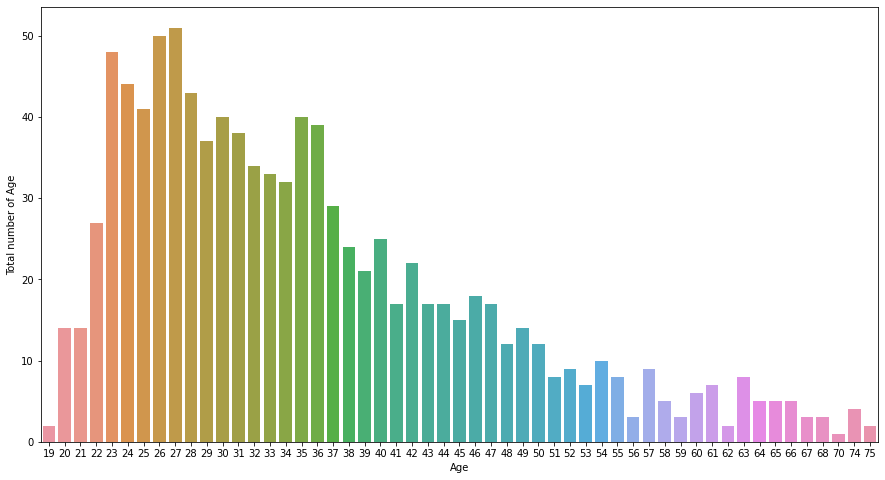

In [64]:
ax = sns.countplot('Age',data = data)
plt.ylabel('Total number of Age')
plt.show()

#### SEX

In [65]:
data.Sex.unique()

array(['male', 'female'], dtype=object)

In [66]:
data['male'] = data['Sex'].apply(lambda X : 0 if X == 'female' else 1)

In [67]:
data=data.drop(['Sex'],axis=1)

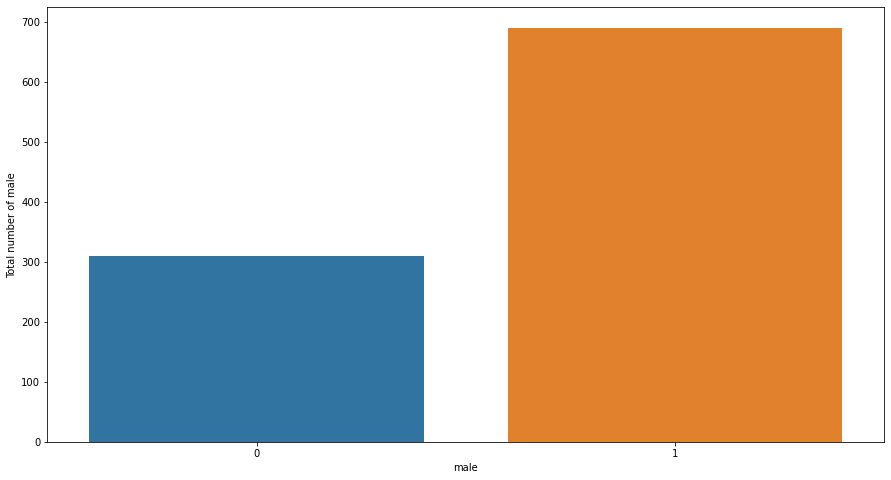

In [68]:
ax = sns.countplot('male',data = data)
plt.ylabel('Total number of male')
plt.show()

#### Job

In [69]:
data.Job.unique()

array([2, 1, 3, 0])

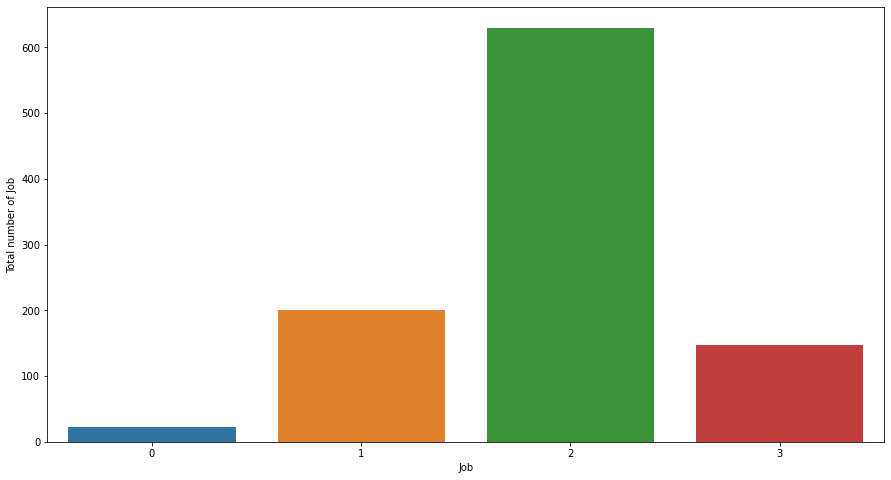

In [70]:
ax = sns.countplot('Job',data = data)
plt.ylabel('Total number of Job')
plt.show()

#### Credit amount

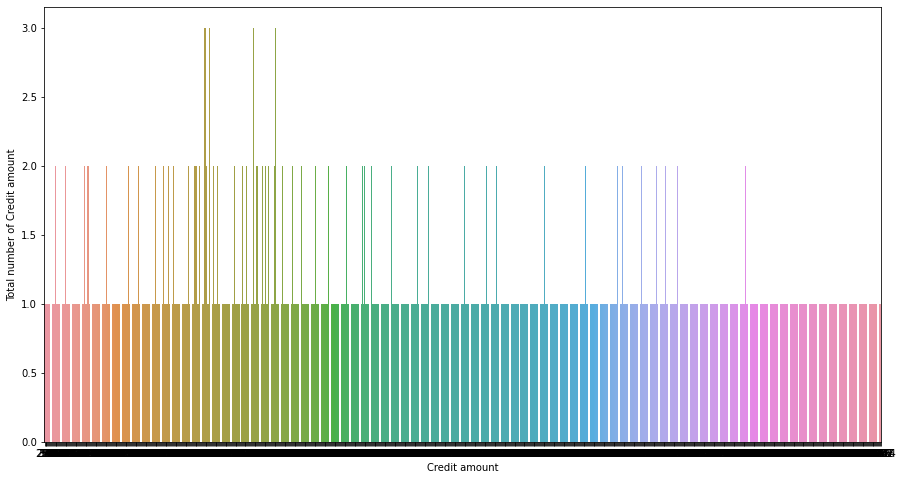

In [71]:
ax = sns.countplot('Credit amount',data = data)
plt.ylabel('Total number of Credit amount')
plt.show()

#### Duration

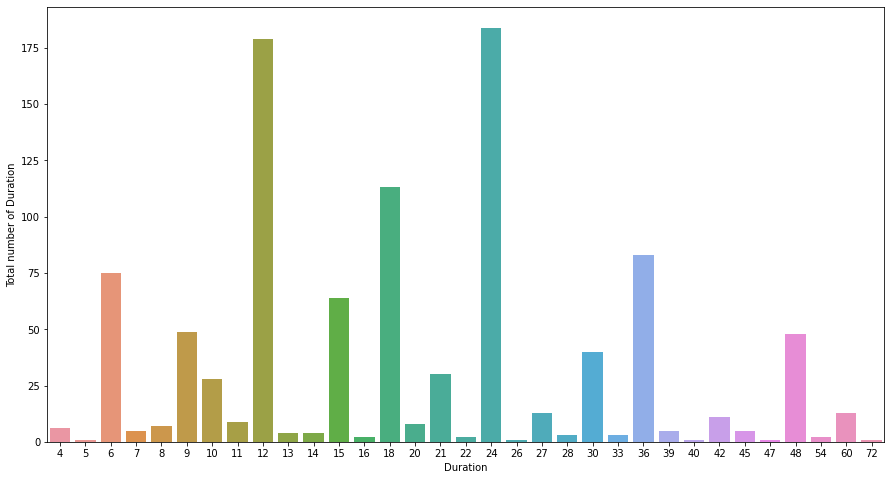

In [72]:
ax = sns.countplot('Duration',data = data)
plt.ylabel('Total number of Duration')
plt.show()

#### Housing

In [73]:
data.Housing.unique()

array(['own', 'free', 'rent'], dtype=object)

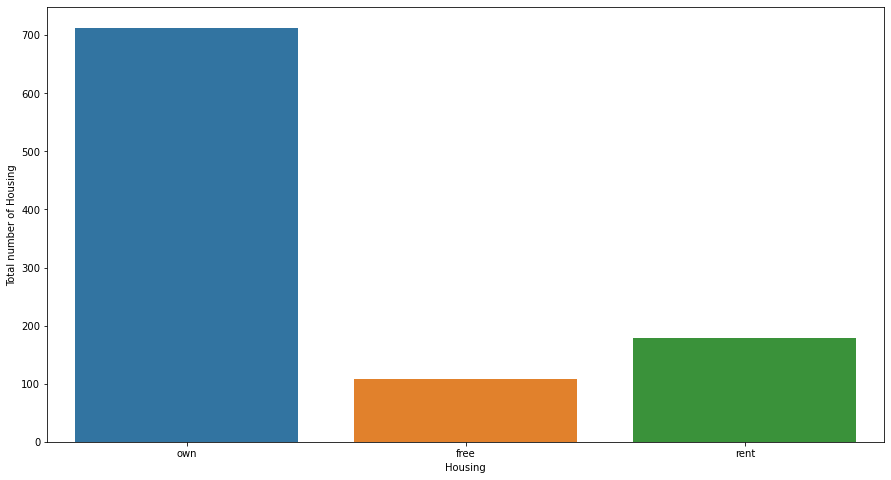

In [74]:
ax = sns.countplot('Housing',data = data)
plt.ylabel('Total number of Housing')
plt.show()

In [75]:
# pd.concat(data,pd.get_dummies(data[['Housing']]))
# data=data.merge(pd.get_dummies(data[['Housing']]),left_index=True, right_index=True)
data['Housing'] = label_encoder.fit_transform(data['Housing'])

#### Saving accounts

In [76]:
data['Saving accounts'].fillna('none', inplace=True)
data_original['Saving accounts'].fillna('none', inplace=True)

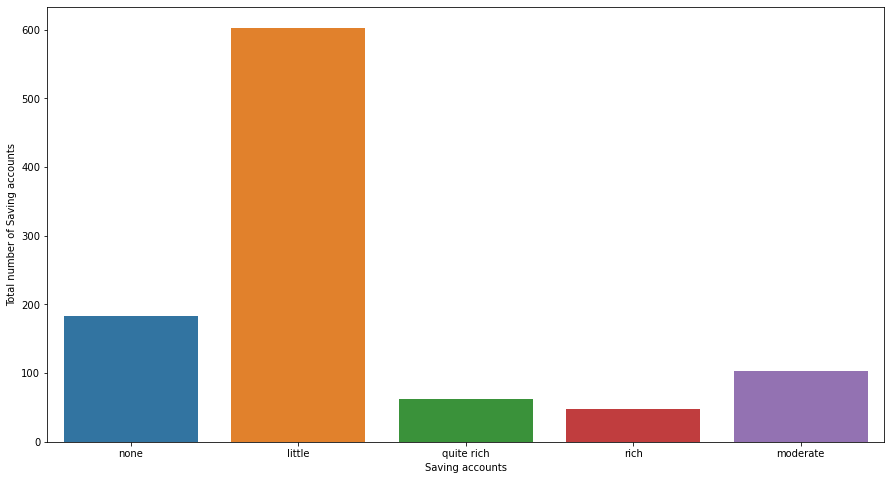

In [77]:
ax = sns.countplot('Saving accounts',data = data)
plt.ylabel('Total number of Saving accounts')
plt.show()

In [78]:
# data=data.merge(pd.get_dummies(data[['Saving accounts']]),left_index=True, right_index=True)
data['Saving accounts'] = label_encoder.fit_transform(data['Saving accounts'])

#### Checking account

In [79]:
data['Checking account'].fillna('none', inplace=True)
data_original['Checking account'].fillna('none', inplace=True)

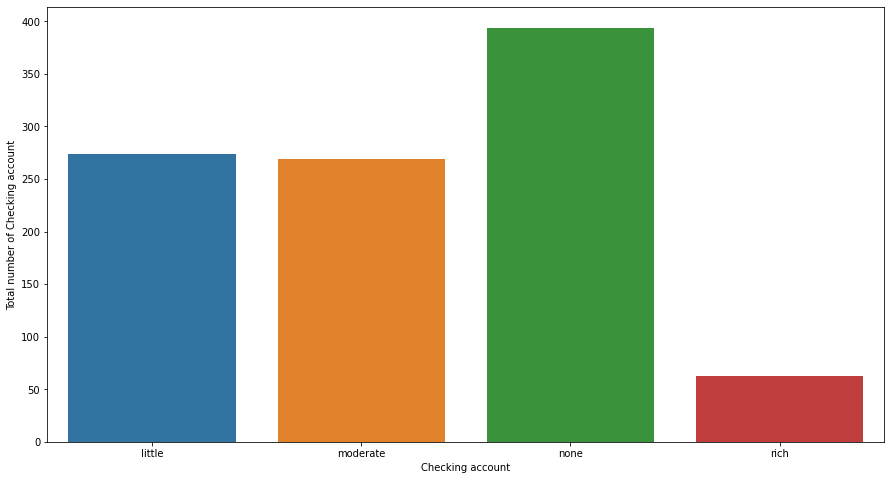

In [80]:
ax = sns.countplot('Checking account',data = data)
plt.ylabel('Total number of Checking account')
plt.show()

In [81]:

data['Checking account'] = label_encoder.fit_transform(data['Checking account'])

In [82]:
data

,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,male
0,67,2,1,2,0,1169,6,radio/TV,1
1,22,2,1,0,1,5951,48,radio/TV,0
2,49,1,1,0,2,2096,12,education,1
3,45,2,0,0,0,7882,42,furniture/equipment,1
4,53,2,0,0,0,4870,24,car,1
...,...,...,...,...,...,...,...,...,...
995,31,1,1,0,2,1736,12,furniture/equipment,0
996,40,3,1,0,0,3857,30,car,1
997,38,2,1,0,2,804,12,radio/TV,1
998,23,2,0,0,0,1845,45,radio/TV,1


#### Purpose

In [83]:
data.Purpose.unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

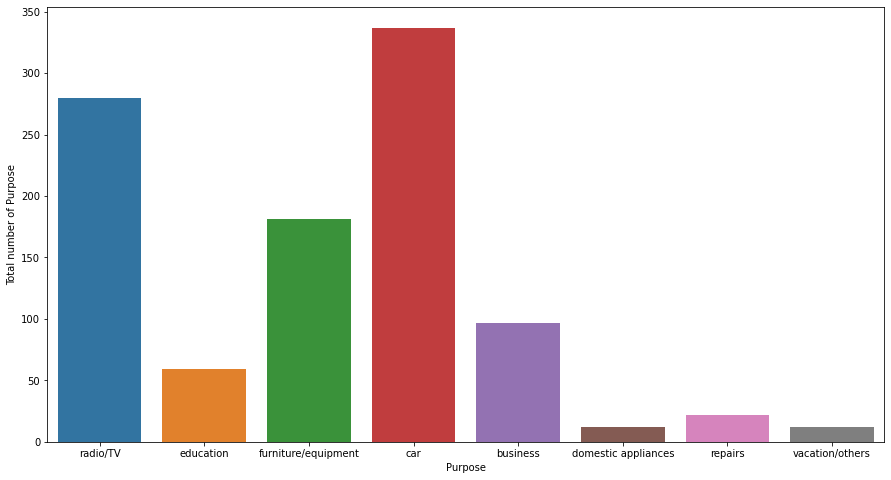

In [84]:
ax = sns.countplot('Purpose',data = data)
plt.ylabel('Total number of Purpose')
plt.show()

In [85]:
# data=data.merge(pd.get_dummies(data[['Purpose']]),left_index=True, right_index=True)

data['Purpose'] = label_encoder.fit_transform(data['Purpose'])

In [86]:
# data=data.drop(['Housing','Saving accounts','Checking account','Purpose'],axis=1)
data

,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,male
0,67,2,1,2,0,1169,6,5,1
1,22,2,1,0,1,5951,48,5,0
2,49,1,1,0,2,2096,12,3,1
3,45,2,0,0,0,7882,42,4,1
4,53,2,0,0,0,4870,24,1,1
...,...,...,...,...,...,...,...,...,...
995,31,1,1,0,2,1736,12,4,0
996,40,3,1,0,0,3857,30,1,1
997,38,2,1,0,2,804,12,5,1
998,23,2,0,0,0,1845,45,5,1


In [141]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)
data_scaled.head()

,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,male
0,2.77,0.15,-0.13,0.96,-1.34,-0.75,-1.24,1.07,0.67
1,-1.19,0.15,-0.13,-0.71,-0.27,0.95,2.25,1.07,-1.49
2,1.18,-1.38,-0.13,-0.71,0.81,-0.42,-0.74,0.06,0.67
3,0.83,0.15,-2.02,-0.71,-1.34,1.63,1.75,0.57,0.67
4,1.54,0.15,-2.02,-0.71,-1.34,0.57,0.26,-0.95,0.67


## Часть 2. Моделирование

In [142]:
X = data_scaled

## KMeans

In [143]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

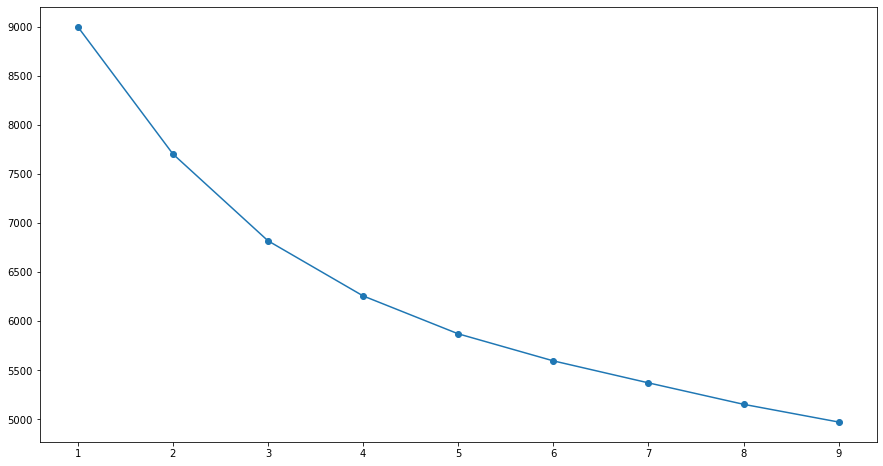

In [144]:
inertia = []
silhouette_scores = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)    
    inertia.append(kmeans.inertia_)
#     silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    
plt.plot(range(1,10), inertia, marker='o');

In [170]:
kmeans = KMeans(n_clusters=4, random_state=5)
kmeans.fit(X)

data_clustered_kmeans = data_original.copy()
data_clustered_kmeans['Cluster'] = kmeans.labels_

data_clustered_kmeans.Cluster.unique()

array([2, 1, 0, 3], dtype=int32)

In [171]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

def visualization_by_reducer(X, clusters, reducer, name):    
    X_reduced = reducer.fit_transform(X)

    plt.figure(figsize=(8, 8))
    sns.scatterplot(
        x=X_reduced[:, 0], 
        y=X_reduced[:, 1], 
        hue=clusters, 
        palette="bright",
        legend='full'
    )    
    plt.title("Data embedded into two dimensions by %s" % name, fontsize=18)
    plt.show()
    
def visualization(X, clusters):
    visualization_by_reducer(X, clusters, PCA(n_components=2), 'PCA')
    visualization_by_reducer(X, clusters, umap.UMAP(n_components=2), 'UMAP')
    visualization_by_reducer(X, clusters, TSNE(n_components=2), 'TSNE')

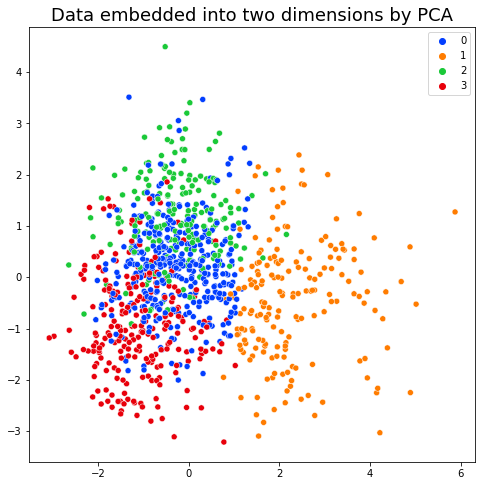

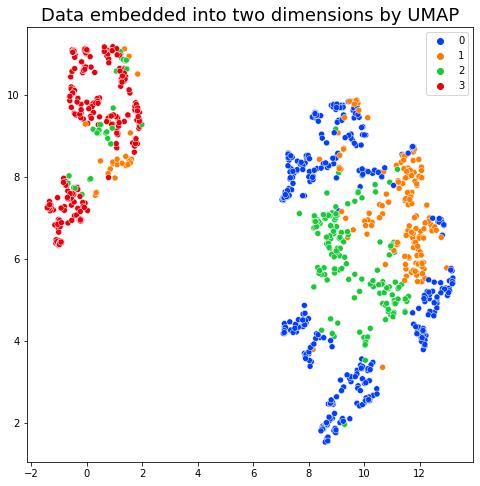

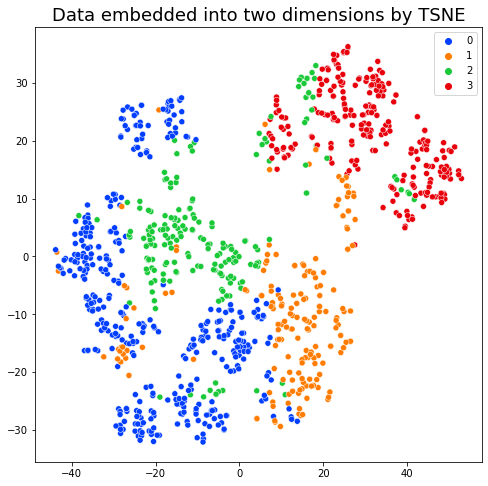

In [172]:
visualization(X, kmeans.labels_)

### 2.2 Hierarhical clustering

In [148]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

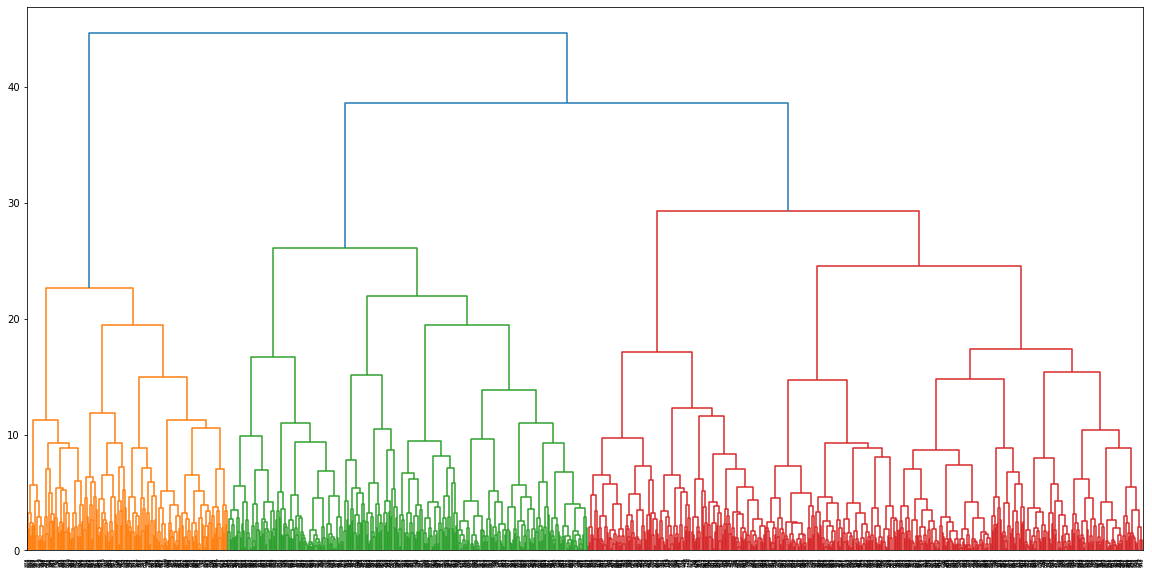

In [149]:
plt.figure(figsize=(20,10))

dendrogram = dendrogram(linkage(X, method='ward'))

In [150]:
aggl_clustering = AgglomerativeClustering(n_clusters=3)
aggl_clustering.fit(X)

data_clustered_aggl = data_original.copy()
data_clustered_aggl['Cluster'] = aggl_clustering.labels_

data_clustered_aggl.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster
0,67,male,2,own,none,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,none,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,1


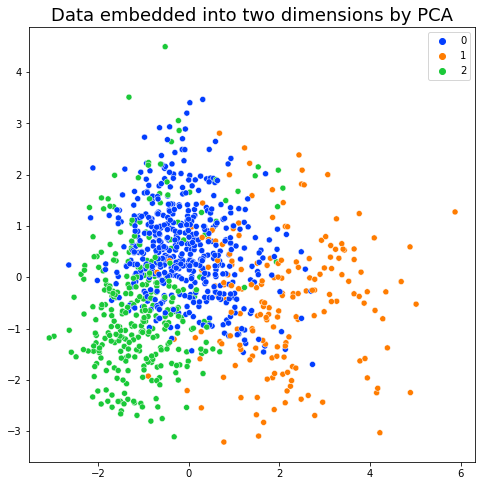

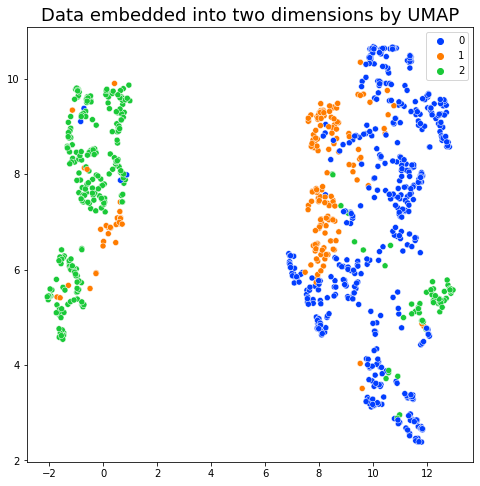

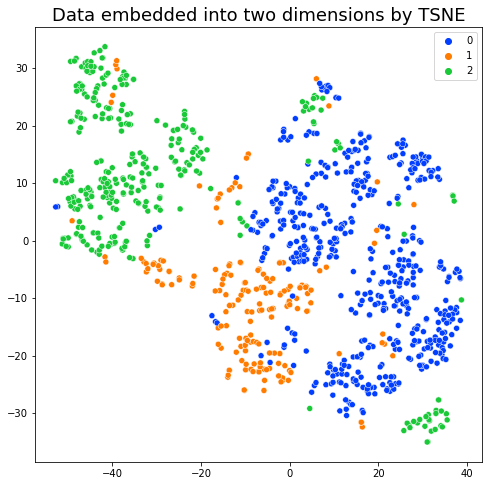

In [151]:
visualization(X, aggl_clustering.labels_)

### DBSCAN

In [152]:
from sklearn.cluster import DBSCAN

In [153]:
dbscan = DBSCAN()
dbscan.fit(X)

data_clustered_dbscan = data_original.copy()
data_clustered_dbscan['Cluster'] = dbscan.labels_

data_clustered_dbscan.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster
0,67,male,2,own,none,little,1169,6,radio/TV,-1
1,22,female,2,own,little,moderate,5951,48,radio/TV,-1
2,49,male,1,own,little,none,2096,12,education,-1
3,45,male,2,free,little,little,7882,42,furniture/equipment,-1
4,53,male,2,free,little,little,4870,24,car,-1


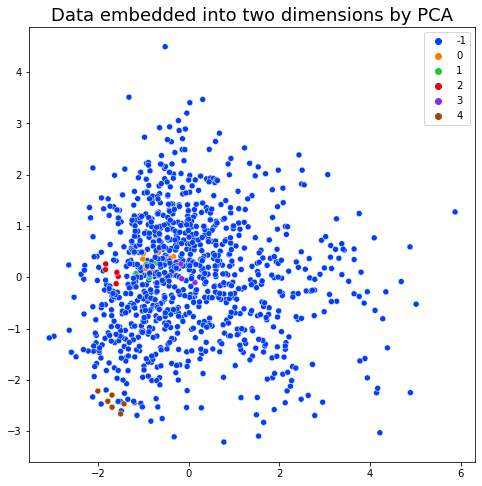

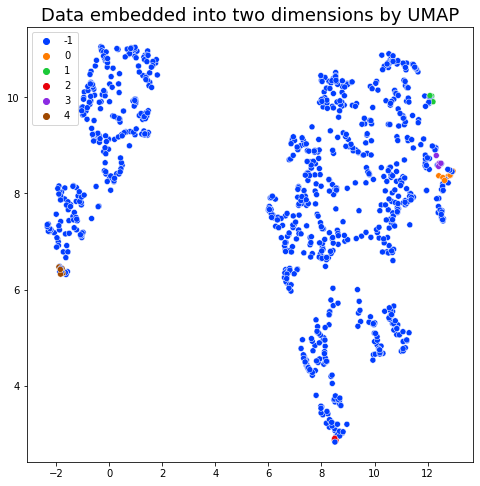

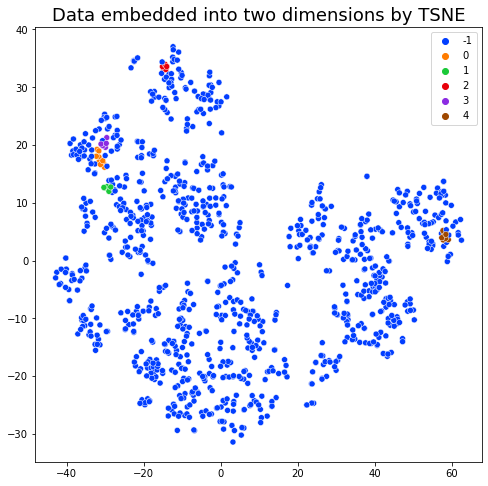

In [154]:
visualization(X, dbscan.labels_)

In [155]:
threshold = 0.1
epsilon = 0.05
outlier_percentage = 1.

epsilons_history = []
clusters_history = []
outliers_history = []

while outlier_percentage > threshold:        
    dbscan = DBSCAN(eps=epsilon)
    dbscan.fit(X)
    clusters = dbscan.labels_
    
    epsilons_history.append(epsilon)
    clusters_history.append(len(np.unique(clusters)) - 1)    
    
    outlier_percentage = sum(clusters == -1) / len(clusters)
    outliers_history.append(outlier_percentage)
    
    epsilon += 0.05

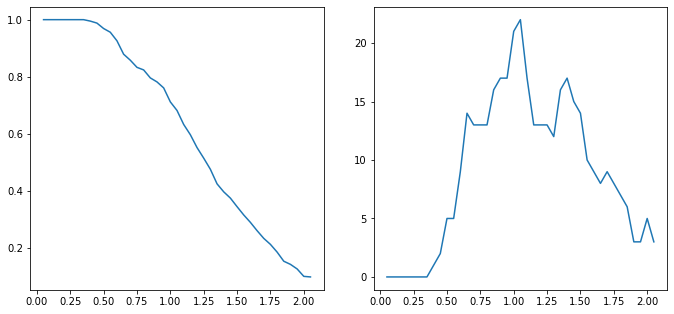

In [156]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axs[0].plot(epsilons_history, outliers_history)
axs[1].plot(epsilons_history, clusters_history)

plt.tight_layout(pad=3.0)
plt.show()

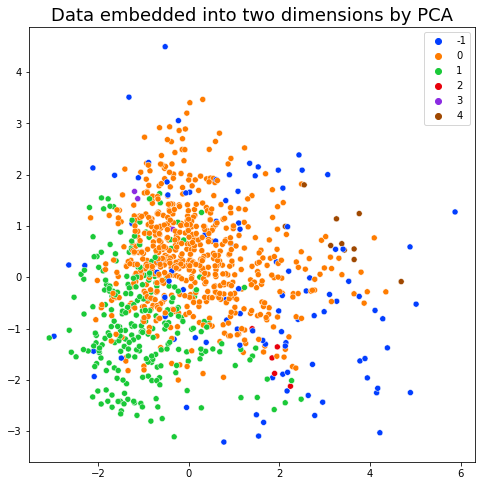

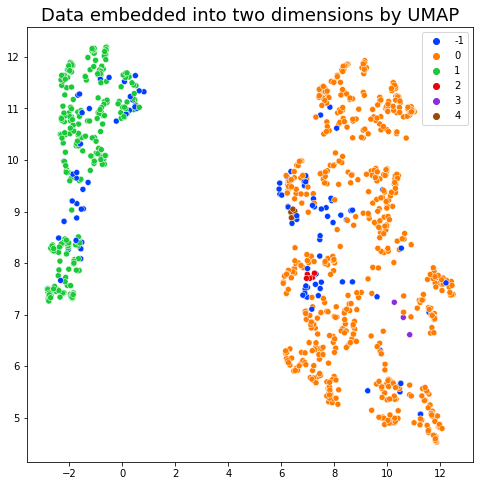

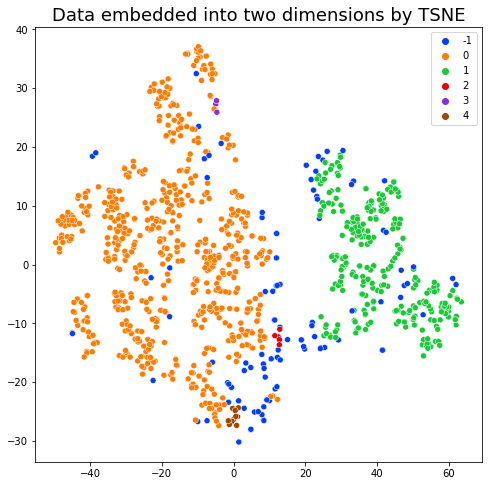

In [157]:
dbscan = DBSCAN(eps=2)
dbscan.fit(X)

data_clustered_dbscan = data_original.copy()
data_clustered_dbscan['Cluster'] = dbscan.labels_

visualization(X, dbscan.labels_)

## Интерпритация

In [178]:
data_inter=data_clustered_aggl


In [179]:
data_inter.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster
0,67,male,2,own,none,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,none,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,1


In [180]:
data_inter.groupby('Cluster').mean()

,Age,Job,Credit amount,Duration
Cluster,,,,
0,36.18,1.81,2500.31,19.05
1,37.42,2.41,7270.41,33.86
2,33.53,1.76,2228.89,16.54


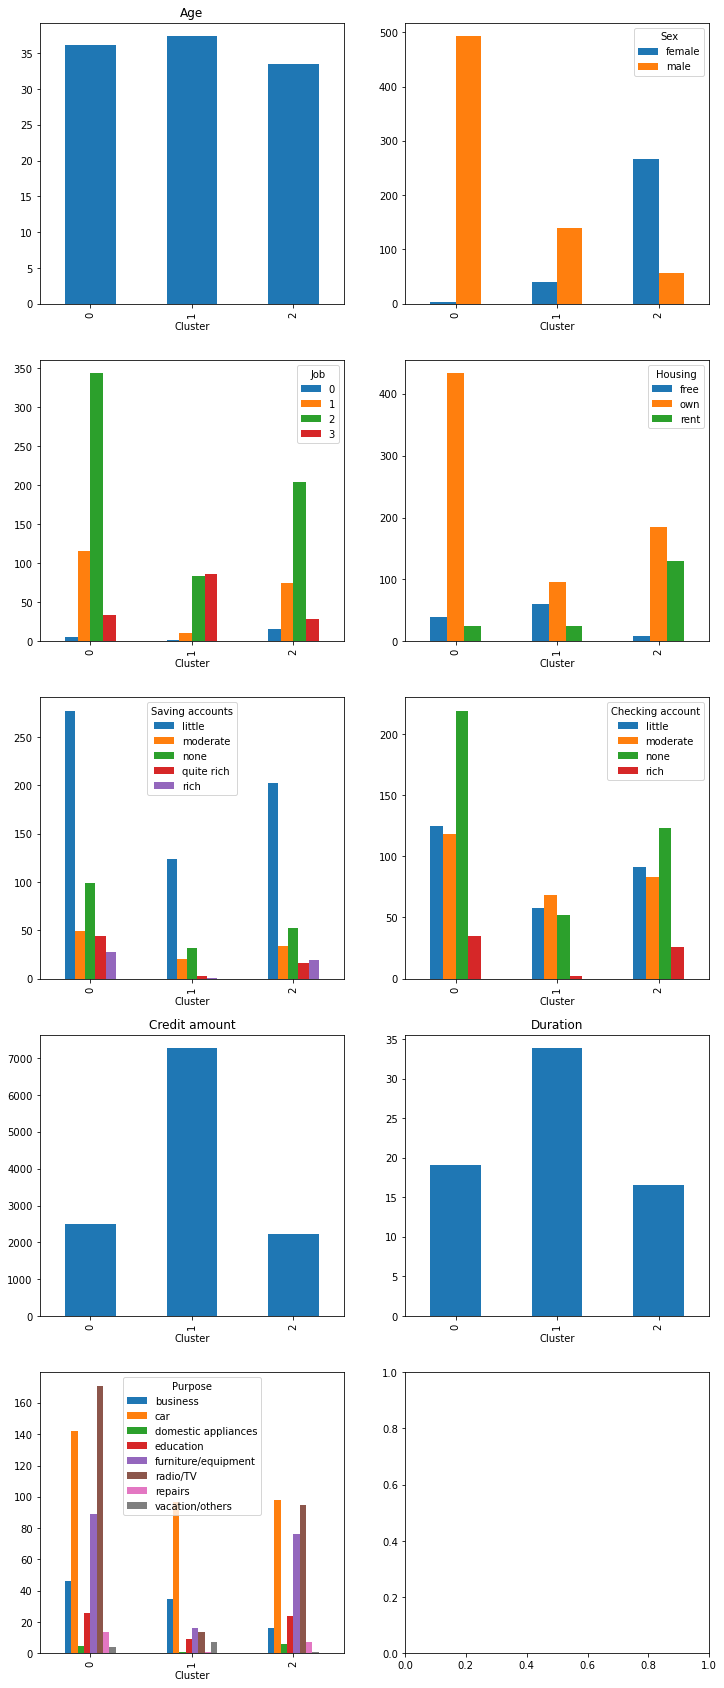

In [181]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12,30))

data_inter.groupby(['Cluster']).mean()['Age'].plot(kind='bar', ax=axs[0, 0])
data_inter.groupby(['Cluster', 'Sex']).size().unstack().plot(kind='bar', ax=axs[0, 1])
data_inter.groupby(['Cluster', 'Job']).size().unstack().plot(kind='bar', ax=axs[1, 0])
data_inter.groupby(['Cluster', 'Housing']).size().unstack().plot(kind='bar', ax=axs[1, 1])
data_inter.groupby(['Cluster', 'Saving accounts']).size().unstack().plot(kind='bar', ax=axs[2, 0])
data_inter.groupby(['Cluster', 'Checking account']).size().unstack().plot(kind='bar', ax=axs[2, 1])
data_inter.groupby(['Cluster']).mean()['Credit amount'].plot(kind='bar', ax=axs[3, 0])
data_inter.groupby(['Cluster']).mean()['Duration'].plot(kind='bar', ax=axs[3, 1])
data_inter.groupby(['Cluster', 'Purpose']).size().unstack().plot(kind='bar', ax=axs[4, 0])

axs[0, 0].set_title('Age')
axs[3, 0].set_title('Credit amount')
axs[3, 1].set_title('Duration')

plt.show()

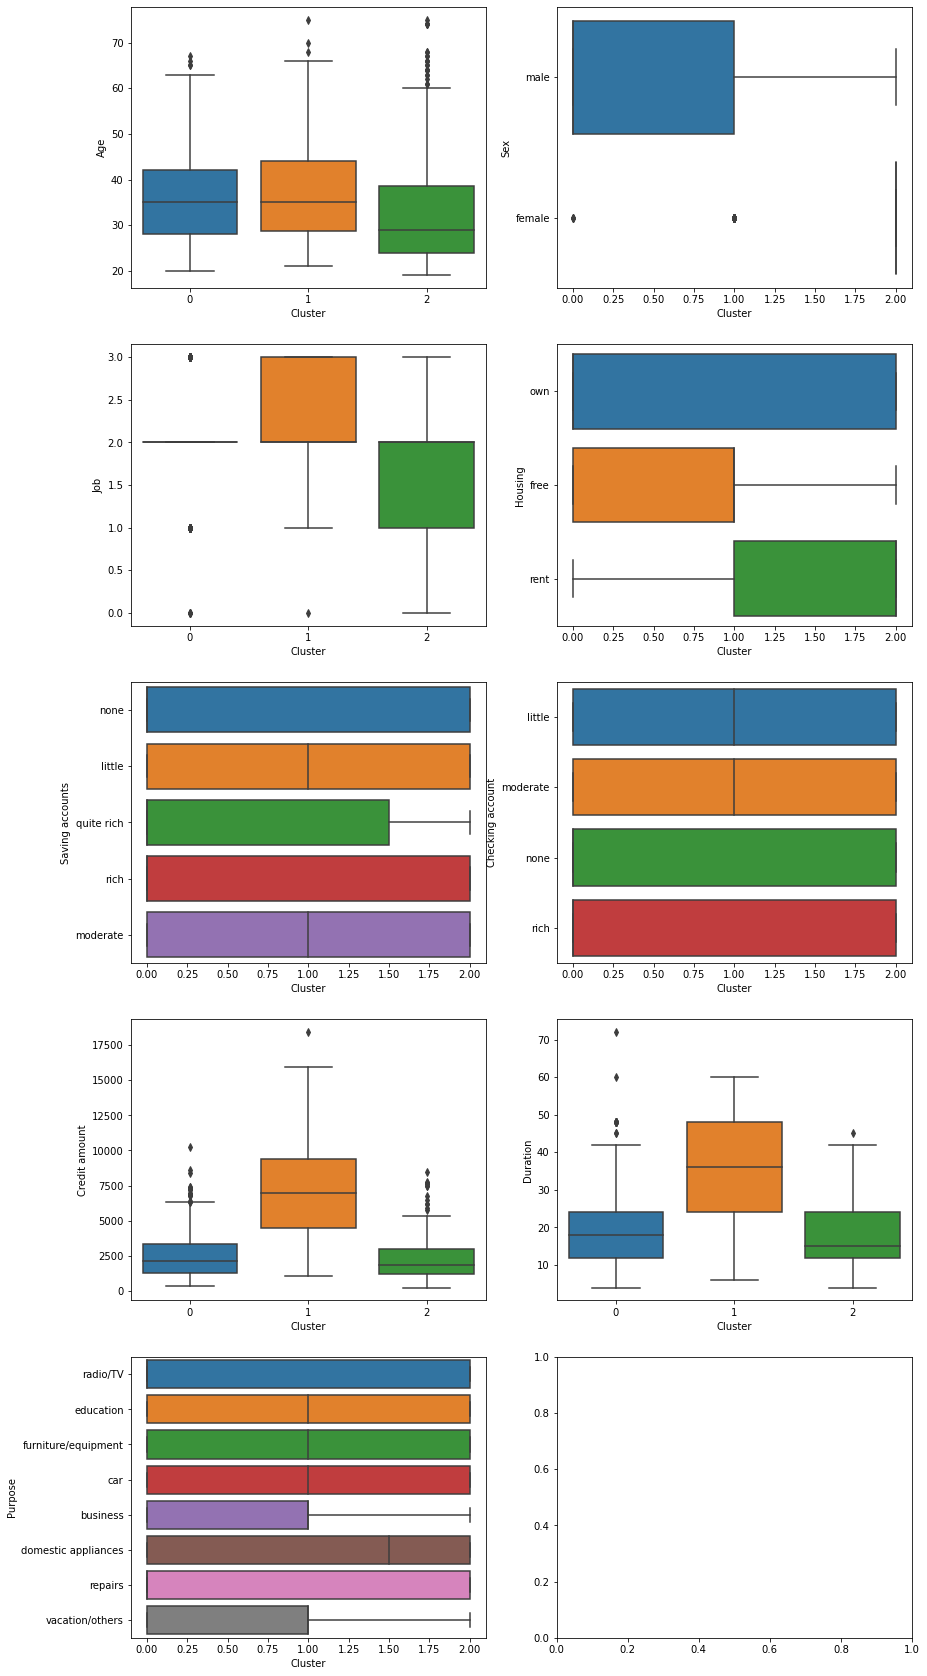

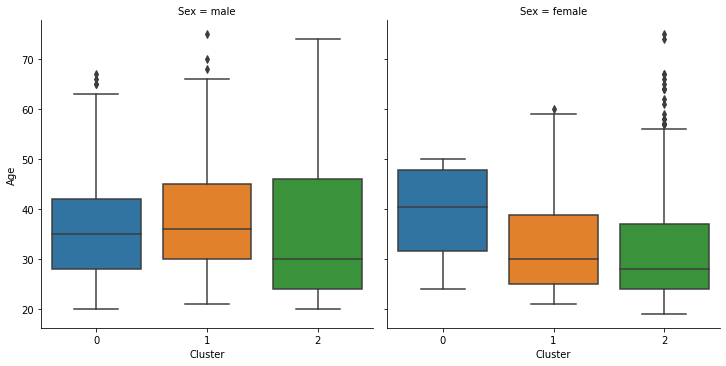

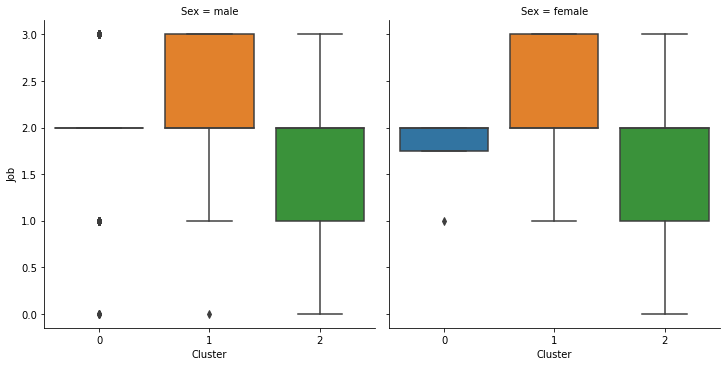

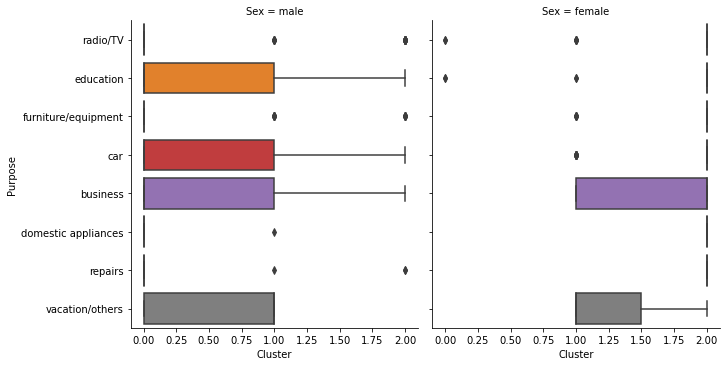

In [182]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(14,30))

sns.boxplot(x='Cluster', y='Age', data=data_inter, ax=axs[0, 0])
sns.boxplot(x='Cluster', y='Sex', data=data_inter, ax=axs[0, 1])
sns.boxplot(x='Cluster', y='Job', data=data_inter, ax=axs[1, 0])
sns.boxplot(x='Cluster', y='Housing', data=data_inter, ax=axs[1, 1])
sns.boxplot(x='Cluster', y='Saving accounts', data=data_inter, ax=axs[2, 0])
sns.boxplot(x='Cluster', y='Checking account', data=data_inter, ax=axs[2, 1])
sns.boxplot(x='Cluster', y='Credit amount', data=data_inter, ax=axs[3, 0])
sns.boxplot(x='Cluster', y='Duration', data=data_inter, ax=axs[3, 1])
sns.boxplot(x='Cluster', y='Purpose', data=data_inter, ax=axs[4, 0])

sns.catplot(x='Cluster', y='Age', data=data_inter, kind="box", col='Sex')
sns.catplot(x='Cluster', y='Job', data=data_inter, kind="box", col='Sex')
sns.catplot(x='Cluster', y='Purpose', data=data_inter, kind="box", col='Sex')

plt.show()

#### В итоге имеем три класстера

1. Мужчины. Имеющии 1-2 работы, в основном собственное жилье, с небольшим сберегательным счетом, небольшим кредитом на срок до 20 на авто/оборудование/ТВ(шо?)

2. В большенстве мужчины которые берут большой кредит на длительный срок в основном на авто, гораздо реже на бизнес

3. В основной массе - женщины, со своим или арендованым жильем, средняя ставка на средний срок. Так же в основном на авто или тв(?)